# 0.- Importar librerías
En esta sección importaremos las librerías necesarias para implementar el algoritmo KNN y realizar visualizaciones.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import utils

# 1.- Importar datos
Cargaremos el conjunto de datos que utilizaremos para entrenar y probar nuestro modelo de KNN.

In [2]:
# importar datos
trainData = np.genfromtxt('trainData.csv', delimiter=',')
testData = np.genfromtxt('testData.csv', delimiter=',')  

# 1.2.- Normalización de datos

In [3]:
# normalizacion de datos
min = np.min(trainData,axis=0)
max = np.max(trainData,axis=0) 

for i in range(1,6):
    trainData[:,i]=(trainData[:,i]- min[i])/(max[i]-min[i])
    testData[:,i]=(testData[:,i]- min[i])/(max[i]-min[i])

# 1.3.- Preprocesamiento de datos 

In [4]:
X = trainData[:,1:6]
etiquetas = trainData[:,0]
X_test = testData[:,1:6]
etiquetas_test = testData[:,0]

etiquetas = etiquetas.astype(int)
etiquetas_test = etiquetas_test.astype(int)

# 2.- Graficar datos
Visualizaremos los datos cargados para comprender su distribución y características.

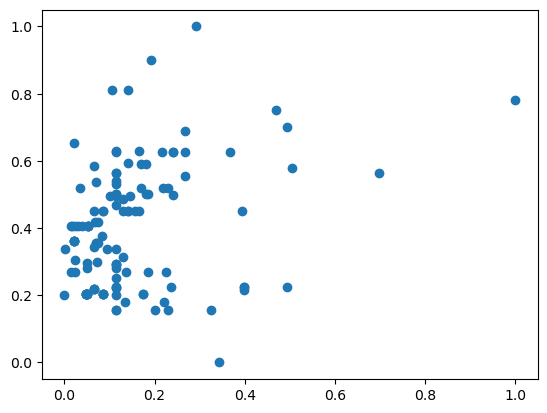

In [5]:
plt.scatter(trainData[:,1],trainData[:,5])

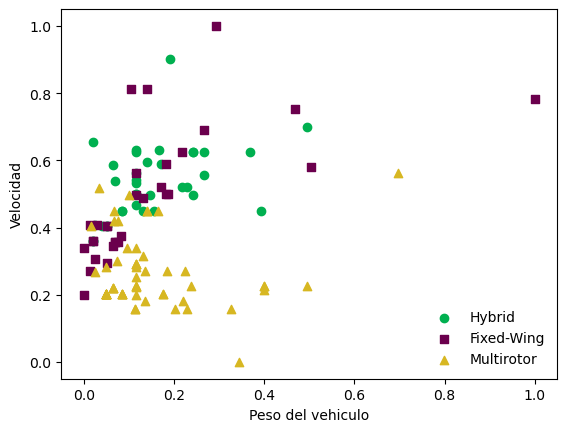

In [15]:
# extraer los indices de las clases
hy_ind = np.where(etiquetas == 0)
f_ind= np.where(etiquetas == 1)
m_ind = np.where(etiquetas == 2)

# separar datos por clases
hybrid = trainData[hy_ind]
fix = trainData[f_ind]
multy = trainData[m_ind]

utils.plot(hybrid,fix,multy,1,5)

# 3.0.- KNN para principiantes
En esta sección, introduciremos el concepto de clasificación con el algoritmo KNN utilizando la librería sklearn.

# 3.1.- Implementación
Implementaremos un clasificador KNN predefinido utilizando la librería sklearn.

In [7]:
knn = KNeighborsClassifier(n_neighbors = 8)
# entrenar 
knn.fit(X,etiquetas)

KNeighborsClassifier(n_neighbors=8)

# 3.2.- Test del modelo
Probaremos el modelo KNN con nuestro conjunto de datos de prueba y evaluaremos su rendimiento.

In [8]:
prediccion_sk = knn.predict(X_test)
utils.test_modelo(prediccion_sk, etiquetas_test)

True
True
True
True
True
False
Prediccion: 0; Etiqueta real: 1
True
True
True
True
True
False
Prediccion: 1; Etiqueta real: 0
True
False
Prediccion: 0; Etiqueta real: 1
Puntuacion:  0.7857142857142857


/Users/julioUriostegui/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# 3.3.- Clasificación de nuevos UAV
Aplicaremos el modelo entrenado para clasificar nuevos UAV.

In [9]:
knn.predict(utils.UAV(130.,39,4*60,4*108,30,min[1::], max[1::]))

/Users/julioUriostegui/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0])

# 4.0.- KNN para Pros
Exploraremos aspectos más avanzados del algoritmo KNN.

# 4.1.- Distancia euclideana
La distancia euclideana entre dos puntos $x$ e $y$ esta definida como:
$$||x-y||=\sqrt{\sum_i (x_i-y_i)^2}$$

In [10]:
def distancia_euclideana(x,y):
    # inicializacion distancia
    distancia = 0.0
    
    # suma al cuadrado
    for i in range (len(x)):
        distancia += (x[i] - y[:,i])**2
        
    # raiz cuadrado
    distancia = np.sqrt(distancia)
            
    return distancia

# 4.2- Vecinos más cercanos
Ahora buscaremos los "k" vecinos más cercanos.


In [11]:
def vecinos_mas_cercanos(X_sin_clase, X, num_vecinos):
    
    # inicializacion vecinos
    vecinos = np.empty((0,num_vecinos), int)
    
    for elementos_x in X_sin_clase:
        
        # distancia eucl.
        eu_dis = distancia_euclideana(elementos_x, X)
        
        # ordenar vecinos más cercanos
        index = np.argsort(eu_dis)
        
        # tomar solo k vecinos más cercanos
        vecinos_ = np.array([index[:num_vecinos]])
        
        # guardar en vector de vecinos mas cercanos
        vecinos = np.append(vecinos,vecinos_, axis=0)
        
    return vecinos

# 4.3.- Clasificación
Clasificaremos el nuevo punto segun las etiquetas más repetidas en los "k" vecinos más cercanos.

In [12]:
def clasificacion(X_sin_clase, X, etiquetas, num_vecinos):
   
    # inicializacion prediccion
    prediccion = np.empty((0), int)
    
    # calcular vecinos más cercanos
    vecinos = vecinos_mas_cercanos(X_sin_clase, X, num_vecinos)
    
   
    for elementos_vecinos in vecinos:  

        # tomar la clase con el mayor numero de vecinos cercanos
        prediccion_ = np.bincount(etiquetas[elementos_vecinos]).argmax()
        
        # guardar en vetor vecinos
        prediccion = np.append(prediccion, prediccion_)
        
    return prediccion

# 4.4.- Test del modelo
Probaremos el modelo KNN con nuestro conjunto de datos de prueba y evaluaremos su rendimiento.

In [13]:
prediccion = clasificacion(X_test, X, etiquetas, 7)

utils.test_modelo(prediccion, etiquetas_test)


True
True
True
True
True
False
Prediccion: 0; Etiqueta real: 1
True
True
True
True
True
False
Prediccion: 1; Etiqueta real: 0
True
True
Puntuacion:  0.8571428571428571


# 4.5- Clasificación de nuevos UAVs
Aplicaremos el modelo entrenado para clasificar nuevos UAV.

In [14]:
clasificacion(utils.UAV(130.,39,4*60,4*108,30,min[1::], max[1::]), X, etiquetas, 7)

array([0])